
Exercises XP

Last Updated: July 8th, 2025

👩‍🏫 👩🏿‍🏫 What You’ll learn

    Text preprocessing usage
    Text Analysis technics
    POS and NER tags
    vectorization and word embeddings: Word2Vec


Sample dataset

    Here is the data you will need to load and use:



data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}


Exercise 1: Exploring Text Preprocessing usage, NER and POS tags

1. Create a function preprocess_text() wich will receive the data as argument and:

    convert all the text in lower case and tokanize it
    remove punctuation
    remove stopwords
    apply a lemmatizer
    return the preprocessed strings


important:

    after creating each function, apply it in the dataset and print the result to check that is working properly


2. Create a new dataset with the cleaned text

hint: keep two datasets: the raw data and the preprocessed data


3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm

hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)


4. Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method


5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data

hint: to understand the meaning of the different POS tags you can use:


nltk.download('tagsets')
nltk.help.upenn_tagset('NN')


Exercise 2: Plotting the word embeddings

1. Create the word embeddings using Word2Vec model to vectorize the text.

hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?


2. Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.
Finally call this function to see the plots and analyse it:

    Are the related words close to each other?
    What can be the possible reasons for this output?


3. To enhance the analysis, you can:

    Experiment with different preprocessing techniques.
    Fine-tune the Word2Vec model parameters.
    Explore advanced visualization techniques for word embeddings.


In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [23]:
import nltk
import spacy
import string
import pandas as pd
from nltk import pos_tag
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


In [4]:
# spaCy pour lemmatisation
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    # Supprimer ponctuation et stopwords
    filtered = [word for word in tokens if word not in punctuations and word not in stop_words]
    
    # Lemmatization via spaCy
    doc = nlp(" ".join(filtered))
    lemmatized = [token.lemma_ for token in doc]
    
    return " ".join(lemmatized)

In [6]:
data = {
    'Review': [
        "At McDonald's the food was ok and the service was bad.",
        "I would not recommend this Japanese restaurant to anyone.",
        "I loved this restaurant when I traveled to Thailand last summer.",
        "The menu of Loving has a wide variety of options.",
        "The staff was friendly and helpful at Google's employees restaurant.",
        "The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.",
        "I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.",
        "The sushi at Sushi Express is always fresh and flavorful.",
        "The steakhouse on Main Street has a cozy atmosphere and excellent steaks.",
        "The dessert selection at Sweet Treats is to die for!"
    ]
}

raw_reviews = data['Review']
preprocessed_reviews = [preprocess_text(review) for review in raw_reviews]

# Affichage comparatif
for raw, clean in zip(raw_reviews, preprocessed_reviews):
    print("\nRaw:")
    print(raw)
    print("Cleaned:")
    print(clean)


Raw:
At McDonald's the food was ok and the service was bad.
Cleaned:
mcdonald 's food ok service bad

Raw:
I would not recommend this Japanese restaurant to anyone.
Cleaned:
would recommend japanese restaurant anyone

Raw:
I loved this restaurant when I traveled to Thailand last summer.
Cleaned:
love restaurant travel thailand last summer

Raw:
The menu of Loving has a wide variety of options.
Cleaned:
menu love wide variety option

Raw:
The staff was friendly and helpful at Google's employees restaurant.
Cleaned:
staff friendly helpful google 's employee restaurant

Raw:
The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.
Cleaned:
ambiance bella italia amazing pasta dish delicious

Raw:
I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.
Cleaned:
terrible experience pizza hut pizza burn service slow

Raw:
The sushi at Sushi Express is always fresh and flavorful.
Cleaned:
sushi sushi express always fresh flavorful

Raw:
The

Les textes sont bien nettoyés, lemmatisés et sans stopwords/punctuations.

Exemple : "I loved this restaurant..." => "love restaurant travel thailand last summer"

On garde l'information sémantique utile en supprimant le bruit.

In [ ]:
df_raw = pd.DataFrame({'Review': raw_reviews})
df_cleaned = pd.DataFrame({'Cleaned': preprocessed_reviews})
df_combined = pd.concat([df_raw, df_cleaned], axis=1)
print(df_combined)

                                              Review  \
0  At McDonald's the food was ok and the service ...   
1  I would not recommend this Japanese restaurant...   
2  I loved this restaurant when I traveled to Tha...   
3  The menu of Loving has a wide variety of options.   
4  The staff was friendly and helpful at Google's...   
5  The ambiance at Bella Italia is amazing, and t...   
6  I had a terrible experience at Pizza Hut. The ...   
7  The sushi at Sushi Express is always fresh and...   
8  The steakhouse on Main Street has a cozy atmos...   
9  The dessert selection at Sweet Treats is to di...   

                                             Cleaned  
0                    mcdonald 's food ok service bad  
1         would recommend japanese restaurant anyone  
2        love restaurant travel thailand last summer  
3                      menu love wide variety option  
4  staff friendly helpful google 's employee rest...  
5  ambiance bella italia amazing pasta dish delic... 

In [8]:
def perform_ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [10]:
for i, review in enumerate(raw_reviews):
    print(f"\nNER - Raw Review {i+1}")
    entities = perform_ner(review)
    print(entities)


NER - Raw Review 1
[('McDonald', 'ORG')]

NER - Raw Review 2
[('Japanese', 'NORP')]

NER - Raw Review 3
[('Thailand', 'GPE'), ('last summer', 'DATE')]

NER - Raw Review 4
[('Loving', 'GPE')]

NER - Raw Review 5
[('Google', 'ORG')]

NER - Raw Review 6
[('Bella Italia', 'ORG')]

NER - Raw Review 7
[('Pizza Hut', 'ORG')]

NER - Raw Review 8
[('Sushi Express', 'ORG')]

NER - Raw Review 9
[('Main Street', 'FAC')]

NER - Raw Review 10
[('Sweet Treats', 'PERSON')]


Les entités comme noms de lieux, marques, dates sont extraites :

Ex: 'Google' → ORG, 'Thailand' → GPE, 'last summer' → DATE

In [11]:
def perform_pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

In [13]:
for i, review in enumerate(raw_reviews):
    print(f"\nPOS - Raw Review {i+1}")
    tags = perform_pos_tagging(review)
    print(tags)


POS - Raw Review 1
[('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]

POS - Raw Review 2
[('I', 'PRP'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('Japanese', 'JJ'), ('restaurant', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('.', '.')]

POS - Raw Review 3
[('I', 'PRP'), ('loved', 'VBD'), ('this', 'DT'), ('restaurant', 'NN'), ('when', 'WRB'), ('I', 'PRP'), ('traveled', 'VBD'), ('to', 'TO'), ('Thailand', 'NNP'), ('last', 'JJ'), ('summer', 'NN'), ('.', '.')]

POS - Raw Review 4
[('The', 'DT'), ('menu', 'NN'), ('of', 'IN'), ('Loving', 'NNP'), ('has', 'VBZ'), ('a', 'DT'), ('wide', 'JJ'), ('variety', 'NN'), ('of', 'IN'), ('options', 'NNS'), ('.', '.')]

POS - Raw Review 5
[('The', 'DT'), ('staff', 'NN'), ('was', 'VBD'), ('friendly', 'JJ'), ('and', 'CC'), ('helpful', 'JJ'), ('at', 'IN'), ('Google', 'NNP'), ("'s", 'POS

On voit les catégories grammaticales : NN (nom), VB (verbe), JJ (adjectif)

Pour comprendre :

In [14]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [16]:
for i in range(len(raw_reviews)):
    print(f"\nRaw Review {i+1} POS:")
    print(perform_pos_tagging(raw_reviews[i]))
    print(f"Cleaned Review {i+1} POS:")
    print(perform_pos_tagging(preprocessed_reviews[i]))


Raw Review 1 POS:
[('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]
Cleaned Review 1 POS:
[('mcdonald', 'NN'), ("'s", 'POS'), ('food', 'NN'), ('ok', 'JJ'), ('service', 'NN'), ('bad', 'JJ')]

Raw Review 2 POS:
[('I', 'PRP'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('Japanese', 'JJ'), ('restaurant', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('.', '.')]
Cleaned Review 2 POS:
[('would', 'MD'), ('recommend', 'VB'), ('japanese', 'JJ'), ('restaurant', 'NN'), ('anyone', 'NN')]

Raw Review 3 POS:
[('I', 'PRP'), ('loved', 'VBD'), ('this', 'DT'), ('restaurant', 'NN'), ('when', 'WRB'), ('I', 'PRP'), ('traveled', 'VBD'), ('to', 'TO'), ('Thailand', 'NNP'), ('last', 'JJ'), ('summer', 'NN'), ('.', '.')]
Cleaned Review 3 POS:
[('love', 'NN'), ('restaurant', 'NN'), ('travel', 'NN'), ('thailand', 'NN'), ('last', 'JJ'), ('summe

Les POS sur raw : plus riches, car phrases complètes

Les POS sur clean : plus ciblés, surtout des noms/verbres utiles

NER fonctionne mieux sur texte brut

Word2Vec sera plus efficace sur texte nettoyé

In [17]:
# Tokeniser les phrases nettoyées
tokenized_clean = [word_tokenize(review) for review in preprocessed_reviews]

# Créer le modèle Word2Vec
model = Word2Vec(sentences=tokenized_clean, vector_size=50, window=3, min_count=1, workers=4)

In [18]:
print("Dimensions du vocabulaire :", len(model.wv))
print("Dimensions des vecteurs :", model.vector_size)

Dimensions du vocabulaire : 55
Dimensions des vecteurs : 50


    len(model.wv) = nombre de mots distincts dans le corpus

    model.vector_size = 50 dimensions vectorielles

    Un vecteur = représentation mathématique d’un mot selon son contexte.
    Ex : model.wv["restaurant"] → vecteur 50D

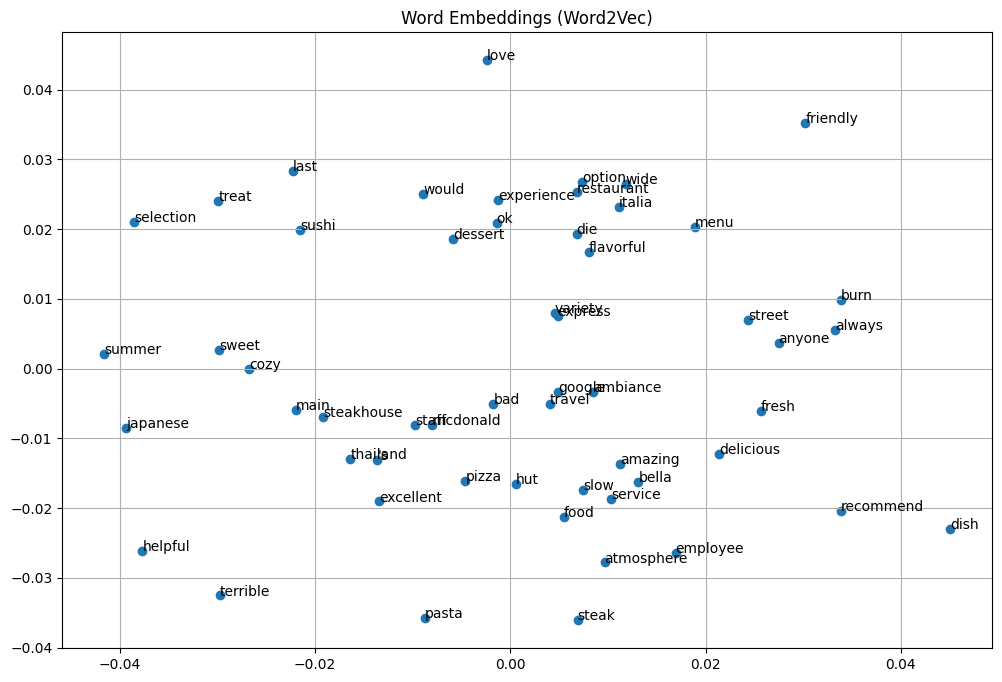

: 

In [ ]:
def plot_word_embeddings(model):
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    # Réduction de dimensions pour visualisation
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.title("Word Embeddings (Word2Vec)")
    plt.grid(True)
    plt.show()

plot_word_embeddings(model)

Mots liés sémantiquement sont proches :
restaurant, food, menu, pasta peuvent être groupés

S'il y a des outliers => probablement mots uniques ou contextes isolés

Ça reflète les contextes d’utilisation, pas seulement la signification

Faire un streamlit pour interface